# **Capacitated Facility Location Problem**

In [347]:
from pulp import *
import matplotlib.pyplot as plt
import math
import numpy as np

## **Establecer Parámetros**

In [348]:
n = 5 # Cantidad de clientes
m = 4 # Cantidad de proveedores

# Lista de clientes
posClientes = [(0, 1), (8, 6), (7, 2), (1, -5), (4, 2)]
clientesX = [posClientes[i][0] for i in range(n)]
clientesY = [posClientes[i][1] for i in range(n)]


# Lista de proveedores
posProvee = [(2, 0), (6.5, -2), (4.5, 5), (2, -5)]
proveeX = [posProvee[i][0] for i in range(m)]
proveeY = [posProvee[i][1] for i in range(m)]


# Diccionario con las demandas
demandas = [80, 270, 250, 160, 180]
# Diccionario con las ofertas
ofertas = [500, 500, 500, 500]
# Diccionario de precios que tiene cada facility
precios = [1000, 1000, 1000, 1000]

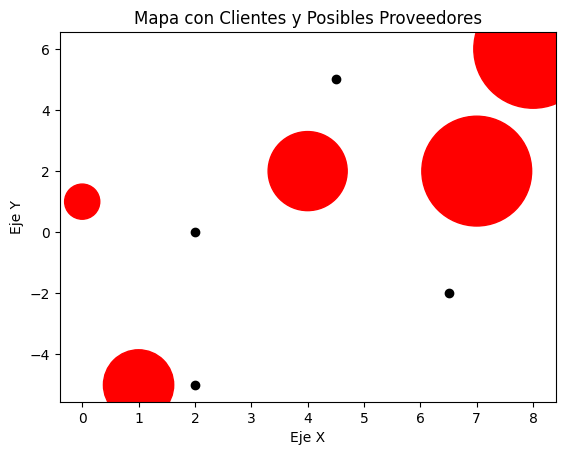

In [349]:
fig, ax = plt.subplots()
ax.scatter(clientesX, clientesY, color = 'red', s = np.array(demandas)**2 / 10)
ax.scatter(proveeX, proveeY, color = 'black')
plt.xlabel("Eje X")
plt.ylabel("Eje Y")
plt.title("Mapa con Clientes y Posibles Proveedores")
plt.show()

Preparar las estructuras de datos.

In [350]:
# Listas de clientes y proveedores
Customer = [i for i in range(1, n+1)]
Facility = [f'Fac_{i}' for i in range(1, m+1)]

# Diccionario de demandas
Demand = {}
for i in range(n):
    Demand[Customer[i]] = demandas[i]

# Diccionarios de ofertas
Max_Supply = {}
for i in range(m):
    Max_Supply[Facility[i]] = ofertas[i]

# Diccionarios de precio de habilitar proveedores
fixed_cost = {}
for i in range(m):
    fixed_cost[Facility[i]] = precios[i]

# Diccionario de costos de transporte
# transportation_cost = {}
# for i in range(m):
#     aux = {}
#     for j in range(n):
#         aux[Customer[j]] = g[i][j]
#     transportation_cost[Facility[i]] = aux

In [351]:
# Generar el grafo de distancias
def distanciaEuclideana(a, b):
    return math.sqrt((a[0]-b[0])**2 + (a[1]-b[1])**2)

transportation_cost = {}
for i in range(m): # Proveedores
    aux = {}
    for j in range(n): # Clientes
        aux[Customer[j]] = distanciaEuclideana(posProvee[i], posClientes[j])
    transportation_cost[Facility[i]] = aux
transportation_cost

{'Fac_1': {1: 2.23606797749979,
  2: 8.48528137423857,
  3: 5.385164807134504,
  4: 5.0990195135927845,
  5: 2.8284271247461903},
 'Fac_2': {1: 7.158910531638177,
  2: 8.139410298049853,
  3: 4.031128874149275,
  4: 6.264982043070834,
  5: 4.716990566028302},
 'Fac_3': {1: 6.020797289396148,
  2: 3.640054944640259,
  3: 3.905124837953327,
  4: 10.594810050208546,
  5: 3.0413812651491097},
 'Fac_4': {1: 6.324555320336759,
  2: 12.529964086141668,
  3: 8.602325267042627,
  4: 1.0,
  5: 7.280109889280518}}

## **Planteamiento del Problema**

In [352]:
# Setting the Problem
prob = LpProblem("Capacitated Facility Location Problem", LpMinimize)

In [353]:
# Defining our Desicion Variables
use_facility = LpVariable.dicts("Use Facility", Facility, 0, 1, LpBinary)
ser_customer = LpVariable.dicts("Service", [(i,j) for i in Customer for j in Facility], 0)

In [354]:
# Setting the Objective Function
prob += lpSum(fixed_cost[j]*use_facility[j] for j in Facility) + lpSum(transportation_cost[j][i]*ser_customer[(i,j)] for j in Facility for i in Customer)

In [355]:
# Costraints
for i in Customer:
    prob += lpSum(ser_customer[(i,j)] for j in Facility) == Demand[i]

for j in Facility:
    prob += lpSum(ser_customer[(i,j)] for i in Customer) <= Max_Supply[j]*use_facility[j]

for i in Customer:
    for j in Facility:
        prob += ser_customer[(i,j)] <= Demand[i]*use_facility[j]

## **Resolver el Modelo Matemático**

In [356]:
prob.solve()
print("Status de la solución:", LpStatus[prob.status])

Status de la solución: Optimal


In [357]:
# Print the solution of Binary Decision Variables
Tolerance = 0.0001
for j in Facility:
    if use_facility[j].varValue > Tolerance:
        print("Se establece el proveedor:", j)

Se establece el proveedor: Fac_1
Se establece el proveedor: Fac_3


In [358]:
# Print the solution of Continuous Decision Variables
solution = []
for v in prob.variables():
    print(v.name, "=", v.varValue)
    solution.append(v.varValue)

Service_(1,_'Fac_1') = 80.0
Service_(1,_'Fac_2') = 0.0
Service_(1,_'Fac_3') = 0.0
Service_(1,_'Fac_4') = 0.0
Service_(2,_'Fac_1') = 0.0
Service_(2,_'Fac_2') = 0.0
Service_(2,_'Fac_3') = 270.0
Service_(2,_'Fac_4') = 0.0
Service_(3,_'Fac_1') = 20.0
Service_(3,_'Fac_2') = 0.0
Service_(3,_'Fac_3') = 230.0
Service_(3,_'Fac_4') = 0.0
Service_(4,_'Fac_1') = 160.0
Service_(4,_'Fac_2') = 0.0
Service_(4,_'Fac_3') = 0.0
Service_(4,_'Fac_4') = 0.0
Service_(5,_'Fac_1') = 180.0
Service_(5,_'Fac_2') = 0.0
Service_(5,_'Fac_3') = 0.0
Service_(5,_'Fac_4') = 0.0
Use_Facility_Fac_1 = 1.0
Use_Facility_Fac_2 = 0.0
Use_Facility_Fac_3 = 1.0
Use_Facility_Fac_4 = 0.0


In [359]:
# Print Optimal
print("Costo total:", value(prob.objective))

Costo total: 5492.542286753968


In [360]:
selectedProvee = solution[-m:]
for i in range(m):
    if selectedProvee[i] == 0: selectedProvee[i] += 0.25

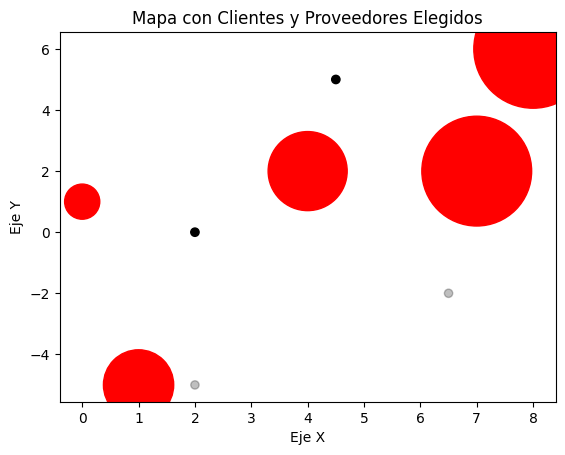

In [361]:
fig, ax = plt.subplots()
ax.scatter(clientesX, clientesY, color = 'red', s = np.array(demandas)**2 / 10)
ax.scatter(proveeX, proveeY, color = 'black', alpha = selectedProvee)
plt.xlabel("Eje X")
plt.ylabel("Eje Y")
plt.title("Mapa con Clientes y Proveedores Elegidos")
plt.show()